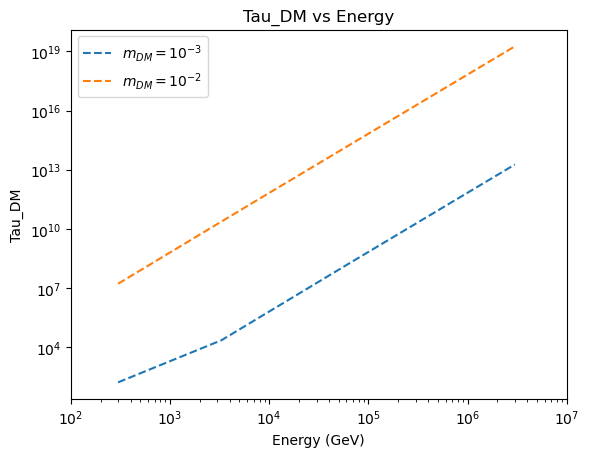

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Rho_DM = 10**18  # GeV/cm^3  NGC1068 using proton 
m_DM = 10**-3  # GeV
m_dm = 10**-2  # GeV
m_proton = 0.938  # GeV
sigma_DMp = 10**-37  # cm^2
Lambda = 0.77  # GeV
# Function to calculate Tau_DM for a given energy E
def calculate_Tau_DM(E):
    mu_DMp = (m_DM * m_proton) * (m_proton + m_DM)**-1  # Reduce mass
    T_DM= E - m_DM  # Kentic energy 
    T_DMmax = ((2 * T_DM**2 + 2 * m_proton * T_DM) / m_DM) * ((1 + m_proton / m_DM)**2 + 2 * T_DM / m_DM)**-1
    q = np.sqrt(2 * m_DM * T_DMmax)  # Momentum transfer of the process
    s = m_DM**2 + m_proton**2 + 2 * E * m_DM  # Square of center of mass energy
    F_p = (1 + (q**2 / Lambda**2))**-2 
    X = (sigma_DMp / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_proton**2) * (q**2 + 4 * m_DM**2)

    # Define the integration function
    def integration(T_DM):
        return T_DM * X

    # Integrate over T_DM to get Y
    Y, _ = quad(integration, 0, T_DMmax)

    # Calculate Z and Tau_DM
    Z = -(Rho_DM / m_DM) * Y
    Tau_DM = -E * (Z)**-1

    return Tau_DM /(3*10**10)

def calculate_Tau_dm(E):
    mu_DMp = (m_dm * m_proton) * (m_proton + m_dm)**-1  # Reduce mass
    T_dm = E - m_dm  # Kentic energy 
    T_DMmax = ((2 * T_dm**2 + 2 * m_proton * T_dm) / m_dm) * ((1 + m_proton / m_dm)**2 + 2 * T_dm / m_dm)**-1
    q = np.sqrt(2 * m_dm * T_DMmax)  # Momentum transfer of the process
    s = m_dm**2 + m_proton**2 + 2 * E * m_dm  # Square of center of mass energy
    F_p = (1 + (q**2 / Lambda**2))**-2 
    X = (sigma_DMp / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_proton**2) * (q**2 + 4 * m_dm**2)

    # Define the integration function
    def integration2(T_DM):
        return T_DM * X

    # Integrate over T_DM to get Y
    Y, _ = quad(integration2, 0, T_DMmax)

    # Calculate Z and Tau_DM
    Z = -(Rho_DM / m_dm) * Y
    Tau_dm = -E * (Z)**-1

    return Tau_dm /(3*10**10)

# Generate E values within the specified range
E_values = np.linspace(300, 3000000, 1000)

# Calculate Tau_DM for each E value
Tau_DM_values = [calculate_Tau_DM(E) for E in E_values]
Tau_dm_values = [calculate_Tau_dm(E) for E in E_values]

# Plot the results with a dashed line
plt.plot(E_values, Tau_DM_values, linestyle='--', label='$m_{DM} = 10^{-3}$')
plt.plot(E_values, Tau_dm_values, linestyle='--', label='$m_{DM} = 10^{-2}$')
plt.xscale('log')
plt.yscale('log')
plt.xticks(np.logspace(2, 7, 6))  # Set x-axis ticks every 10**1
#plt.yticks(np.logspace(2, 10, 8)) # Set Y-axis ticks every 10**1
#plt.xlim(10**2, 10**7)  # Limit x-axis range
plt.xlabel('Energy (GeV)')
plt.ylabel('Tau_DM')
plt.title('Tau_DM vs Energy')
plt.legend()
plt.show()


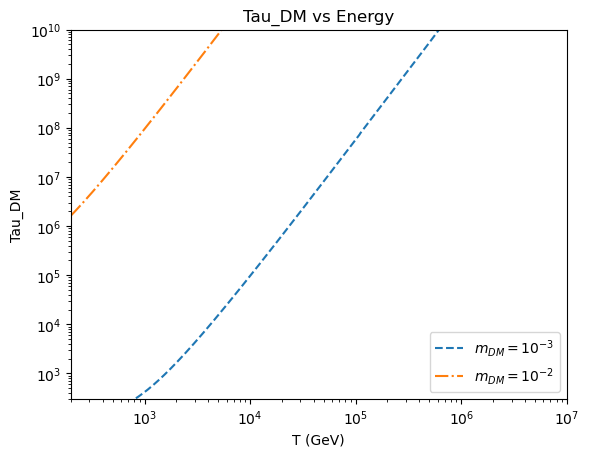

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Rho_DM = 10**18  # GeV/cm^3  NGC1068 using proton 
m_DM = 10**-3  # GeV
m_dm = 10**-2  # GeV
m_proton = 0.938  # GeV
sigma_DMp = 10**-37  # cm^2
Lambda = 0.77  # GeV

# Function to calculate Tau_DM for a given energy E
def calculate_Tau_DM(E):
    mu_DMp = (m_DM * m_proton) * (m_proton + m_DM)**-1  # Reduced mass
    T_proton = E - m_proton  # Kinetic energy 
    T_DMmax = ((2 * T_proton**2 + 2 * m_proton * T_proton) / m_DM) * ((1 + m_proton / m_DM)**2 + 2 * T_proton / m_DM)**-1
    
    # Define the integration function
    def integration(T_DM):
        q = (2 * m_DM * T_DM)**0.5  # Momentum transfer of the process put in integration 
        s = m_DM**2 + m_proton**2 + 2 * E * m_DM  # Square of center of mass energy
        F_p = (1 + (q**2 / Lambda**2))**-2 
        X = (sigma_DMp / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_proton**2) * (q**2 + 4 * m_DM**2)
        return T_DM * X

    # Integrate over T_DM to get Y CHECK
    Y, _ = quad(integration, 0, T_DMmax)

    # Calculate Z and Tau_DM
    Z = -(Rho_DM / m_DM) * Y
    Tau_DM = -E * (Z)**-1

    return Tau_DM / (3 * 10**10)

def calculate_Tau_dm(E):
    mu_DMp = (m_dm * m_proton) * (m_proton + m_dm)**-1  # Reduced mass
    T_proton = E - m_proton  # Kinetic energy 
    T_DMmax = ((2 * T_proton**2 + 2 * m_proton * T_proton) / m_dm) * ((1 + m_proton / m_dm)**2 + 2 * T_proton / m_dm)**-1
    
    # Define the integration function CHECK
    def integration2(T_DM):
        q = (2 * m_dm * T_DM)**0.5 # Momentum transfer of the process
        s = m_dm**2 + m_proton**2 + 2 * E * m_dm  # Square of center of mass energy
        F_p = (1 + (q**2 / Lambda**2))**-2 
        X = (sigma_DMp / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_proton**2) * (q**2 + 4 * m_dm**2)
        return T_DM *X

    # Integrate over T_DM to get Y
    Y, _ = quad(integration2, 0, T_DMmax)

    # Calculate Z and Tau_DM
    Z = -(Rho_DM / m_dm) * Y
    Tau_dm = -E * (Z)**-1

    return Tau_dm / (3 * 10**10)

# Generate T values within the specified range
E_values = np.logspace(2, 7, 1000)

# Calculate Tau_DM for each T value
Tau_DM_values = [calculate_Tau_DM(E) for E in E_values]
Tau_dm_values = [calculate_Tau_dm(E) for E in E_values]

# Plot the results with a dashed line
plt.plot(E_values, Tau_DM_values, linestyle='--', label='$m_{DM} = 10^{-3}$')
plt.plot(E_values, Tau_dm_values, linestyle='-.', label='$m_{DM} = 10^{-2}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (GeV)')
plt.ylabel('Tau_DM')
plt.title('Tau_DM vs Energy')
plt.xticks(np.logspace(2, 7, 6))  # Set X-axis ticks every 10**1
plt.yticks(np.logspace(2, 10, 9))  # Set Y-axis ticks every 10**1
plt.xlim(2*10**2, 1e7)
plt.ylim(3e2, 1e10)
plt.legend()
plt.savefig('/home/user/Downloads/python/picture/BSM cooling time scale/proton.png')
plt.show()

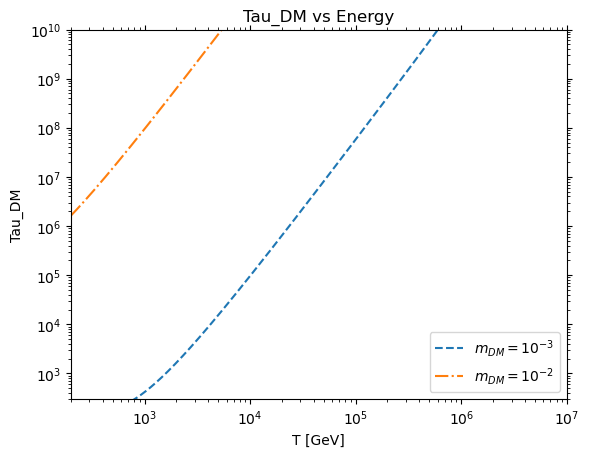

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

RHO_DM =  10**18  # GeV/cm^3  NGC1068 using proton 
m_DM = 10**-3  # GeV
m_dm = 10**-2  # GeV
m_proton = 0.938  # GeV
sigma_DMp = 10**-37  # cm^2
Lambda = 0.77  # GeV

def calculate_Tau_DM(E):
    mu_DMp = (m_DM * m_proton) * (m_proton + m_DM)**-1  # Reduced mass
    T_proton = E - m_proton  # Kinetic energy 
    T_DMmax = ((2 * T_proton**2 + 2 * m_proton * T_proton) / m_DM) * ((1 + m_proton / m_DM)**2 + 2 * T_proton / m_DM)**-1
    
    def integration(T_DM):
        q = (2 * m_DM * T_DM)**0.5  # Momentum transfer of the process put in integration 
        s = m_DM**2 + m_proton**2 + 2 * E * m_DM  # Square of center of mass energy
        F_p = (1 + (q**2 / Lambda**2))**-2 
        X = (sigma_DMp / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_proton**2) * (q**2 + 4 * m_DM**2)
        return T_DM * X

    Y = simps([integration(T_DM) for T_DM in np.linspace(0, T_DMmax, num=1000)], np.linspace(0, T_DMmax, num=1000))
    Z = -(RHO_DM / m_DM) * Y
    Tau_DM = -E * (Z)**-1

    return Tau_DM / (3 * 10**10)

def calculate_Tau_dm(E):
    mu_DMp = (m_dm * m_proton) * (m_proton + m_dm)**-1  # Reduced mass
    T_proton = E - m_proton  # Kinetic energy 
    T_DMmax = ((2 * T_proton**2 + 2 * m_proton * T_proton) / m_dm) * ((1 + m_proton / m_dm)**2 + 2 * T_proton / m_dm)**-1
    
    def integration2(T_DM):
        q = (2 * m_dm * T_DM)**0.5 # Momentum transfer of the process
        s = m_dm**2 + m_proton**2 + 2 * E * m_dm  # Square of center of mass energy
        F_p = (1 + (q**2 / Lambda**2))**-2 
        X = (sigma_DMp / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_proton**2) * (q**2 + 4 * m_dm**2)
        return T_DM * X

    Y = simps([integration2(T_DM) for T_DM in np.linspace(0, T_DMmax, num=1000)], np.linspace(0, T_DMmax, num=1000))
    Z = -(RHO_DM / m_dm) * Y
    Tau_dm = -E * (Z)**-1

    return Tau_dm / (3 * 10**10)

E_values = np.logspace(1, 7, num=1000)
Tau_DM_values = [calculate_Tau_DM(E) for E in E_values]
Tau_dm_values = [calculate_Tau_dm(E) for E in E_values]

plt.plot(E_values, Tau_DM_values, linestyle='--', label='$m_{DM} = 10^{-3}$')
plt.plot(E_values, Tau_dm_values, linestyle='-.', label='$m_{DM} = 10^{-2}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T [GeV]')
plt.ylabel('Tau_DM')
plt.title('Tau_DM vs Energy')
plt.xticks(np.logspace(2, 7, 6))  # Set X-axis ticks every 10**1
plt.yticks(np.logspace(2, 10, 9))  # Set Y-axis ticks every 10**1
plt.xlim(2*10**2, 1e7)
plt.ylim(3e2, 1e10)
plt.legend()
plt.tick_params(top=True, right=True, which='both')
plt.savefig('/home/user/Downloads/python/picture/BSM cooling time scale/proton2.png')
plt.show()

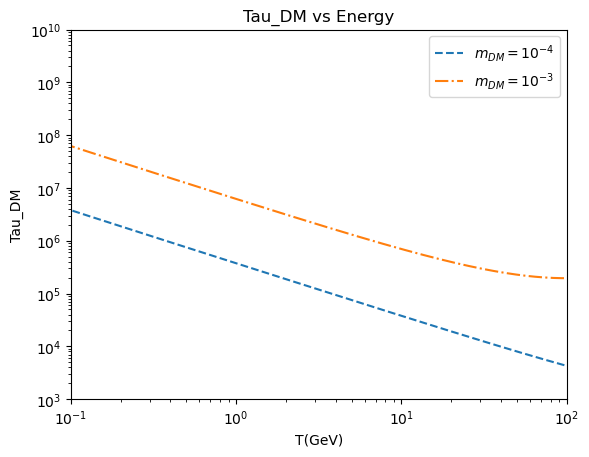

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Rho_DM = 10**13  # GeV/cm^3  TXS 0506+056 using electron 
m_DM = 10**-4  # GeV
m_dm = 10**-3  # GeV
m_electron = 5.11*10**-4  # GeV
sigma_DMe = 10**-36  # cm^2
Lambda = 0.77  # GeV

# Function to calculate Tau_DM for a given energy E
def calculate_Tau_DM(E):
    mu_DMp = (m_DM * m_electron ) * (m_electron  + m_DM)**-1  # Reduced mass
    T_DM = E - m_electron   # Kinetic energy 
    T_DMmax = ((2 * T_DM**2 + 2 * m_electron  * T_DM) / m_DM) * ((1 + m_electron  / m_DM)**2 + 2 * T_DM / m_DM)**-1

    # Define the integration function
    def integration(T_DM):
        q = np.sqrt(2 * m_DM * T_DMmax)  # Momentum transfer of the process
        s = m_DM**2 + m_electron **2 + 2 * E * m_DM  # Square of center of mass energy
        F_p = (1 + (q**2 / Lambda**2))**-2 
        X = (sigma_DMe / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_electron **2) * (q**2 + 4 * m_DM**2)
        return T_DM * X

    # Integrate over T_DM to get Y
    Y, _ = quad(integration, 0, T_DMmax)

    # Calculate Z and Tau_DM
    Z = -(Rho_DM / m_DM) * Y
    Tau_DM = -E * (Z)**-1

    return Tau_DM / (3 * 10**10)

def calculate_Tau_dm(E):
    mu_DMp = (m_dm * m_electron ) * (m_electron  + m_dm)**-1  # Reduced mass
    T_dm = E - m_electron  # Kinetic energy 
    T_DMmax = ((2 * T_dm**2 + 2 * m_electron  * T_dm) / m_dm) * ((1 + m_electron / m_dm)**2 + 2 * T_dm / m_dm)**-1
    

    # Define the integration function
    def integration2(T_DM):
        q = np.sqrt(2 * m_dm * T_DMmax)  # Momentum transfer of the process
        s = m_dm**2 + m_electron **2 + 2 * E * m_dm  # Square of center of mass energy
        F_p = (1 + (q**2 / Lambda**2))**-2 
        X = (sigma_DMe / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_electron **2) * (q**2 + 4 * m_dm**2)
        return T_DM * X

    # Integrate over T_DM to get Y
    Y, _ = quad(integration2, 0, T_DMmax)

    # Calculate Z and Tau_DM
    Z = -(Rho_DM / m_dm) * Y
    Tau_dm = -E * (Z)**-1

    return Tau_dm / (3 * 10**10)

# Generate T values within the specified range
E_values = np.logspace(-2, 3, 1000)

# Calculate Tau_DM for each T value
Tau_DM_values = [calculate_Tau_DM(E) for E in E_values]
Tau_dm_values = [calculate_Tau_dm(E) for E in E_values]

# Plot the results with a dashed line
plt.plot(E_values, Tau_DM_values, linestyle='--', label='$m_{DM} = 10^{-4}$')
plt.plot(E_values, Tau_dm_values, linestyle='-.', label='$m_{DM} = 10^{-3}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T(GeV)')
plt.ylabel('Tau_DM')
plt.title('Tau_DM vs Energy')
#plt.xticks(np.logspace(2, 7, 6))  # Set x-axis ticks every 10**1
#plt.yticks(np.logspace(2, 10, 9)) # Set Y-axis ticks every 10**1
plt.xlim([10**-1, 10**2]) 
plt.ylim([10**3, 10**10])
plt.legend()
plt.savefig('/home/user/Downloads/python/picture/BSM cooling time scale/electron.png')
plt.show()

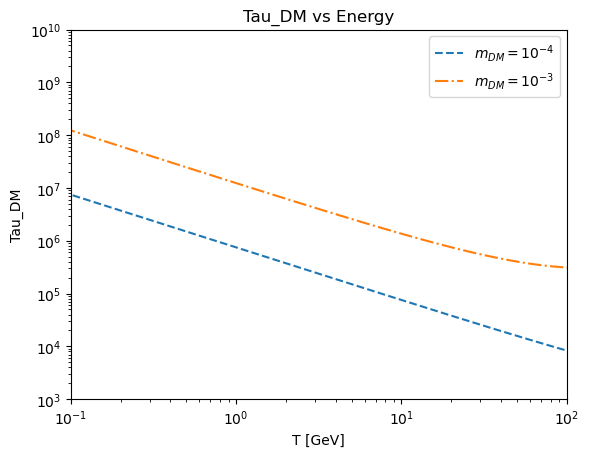

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

RHO_DM =  10**13  # GeV/cm^3  TXS 0506+056 using electron 
m_DM = 10**-4  # GeV
m_dm = 10**-3  # GeV
m_electron = 5.11*10**-4   # GeV
sigma_DMp = 10**-36  # cm^2
Lambda = 0.77  # GeV

def calculate_Tau_DM(E):
    mu_DMp = (m_DM * m_electron) * (m_electron + m_DM)**-1  # Reduced mass
    T_electron = E - m_electron  # Kinetic energy 
    T_DMmax = ((2 * T_electron**2 + 2 * m_electron * T_electron) / m_DM) * ((1 + m_electron / m_DM)**2 + 2 * T_electron / m_DM)**-1
    
    def integration(T_DM):
        q = (2 * m_DM * T_DM)**0.5  # Momentum transfer of the process put in integration 
        s = m_DM**2 + m_electron**2 + 2 * E * m_DM  # Square of center of mass energy
        F_p = (1 + (q**2 / Lambda**2))**-2 
        X = (sigma_DMp / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_electron**2) * (q**2 + 4 * m_DM**2)
        return T_DM * X

    Y = simps([integration(T_DM) for T_DM in np.linspace(0, T_DMmax, num=1000)], np.linspace(0, T_DMmax, num=1000))
    Z = -(RHO_DM / m_DM) * Y
    Tau_DM = -E * (Z)**-1

    return Tau_DM / (3 * 10**10)

def calculate_Tau_dm(E):
    mu_DMp = (m_dm * m_electron) * (m_electron + m_dm)**-1  # Reduced mass
    T_electron = E - m_electron  # Kinetic energy 
    T_DMmax = ((2 * T_electron**2 + 2 * m_electron * T_electron) / m_dm) * ((1 + m_electron / m_dm)**2 + 2 * T_electron / m_dm)**-1
    
    def integration2(T_DM):
        q = (2 * m_dm * T_DM)**0.5 # Momentum transfer of the process
        s = m_dm**2 + m_electron**2 + 2 * E * m_dm  # Square of center of mass energy
        F_p = (1 + (q**2 / Lambda**2))**-2 
        X = (sigma_DMp / T_DMmax) * (F_p**2 / (16 * mu_DMp**2 * s)) * (q**2 + 4 * m_electron**2) * (q**2 + 4 * m_dm**2)
        return T_DM * X

    Y = simps([integration2(T_DM) for T_DM in np.linspace(0, T_DMmax, num=1000)], np.linspace(0, T_DMmax, num=1000))
    Z = -(RHO_DM / m_dm) * Y
    Tau_dm = -E * (Z)**-1

    return Tau_dm / (3 * 10**10)

E_values = np.logspace(-2, 3, 1000)
Tau_DM_values = [calculate_Tau_DM(E) for E in E_values]
Tau_dm_values = [calculate_Tau_dm(E) for E in E_values]

plt.plot(E_values, Tau_DM_values, linestyle='--', label='$m_{DM} = 10^{-4}$')
plt.plot(E_values, Tau_dm_values, linestyle='-.', label='$m_{DM} = 10^{-3}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T [GeV]')
plt.ylabel('Tau_DM')
plt.title('Tau_DM vs Energy')
#plt.xticks(np.logspace(2, 7, 6))  # Set X-axis ticks every 10**1
plt.yticks(np.logspace(3, 10, 8))  # Set Y-axis ticks every 10**1
plt.xlim([10**-1, 10**2])
plt.ylim([10**3, 10**10])
plt.legend()
plt.savefig('/home/user/Downloads/python/picture/BSM cooling time scale/electron2.png')
plt.show()